# Class 7: Visualization for EDA


## Announcements

Syllabus updated
1. [rubric](https://github.com/rhodyprog4ds/BrownFall20/commit/315ce164bc4bd4b7d5ee321afd9143e08f05c07b#diff-1e595cb12e4db779fb0c857562c1e0dd) for summarize and visualize are slightly changed
1. [Please accept assignments](https://github.com/rhodyprog4ds/BrownFall20/commit/f459e8b04dc0b09d2dadba10464f49b25de57190) if you plan to not complete for any reason


Assignment updated to [clarify continuous and categorical variables](https://github.com/rhodyprog4ds/BrownFall20/commit/f719a92c4d5dd00cbe8bf646d9d63280fb4b1e50)


## Loading Data

Importing the libraries for today. We'll continue plotting with pandas and we'll use  [`seaborn`](https://seaborn.pydata.org/introduction.html) as well. Seaborn provides higher level plotting functions and [better formatting](https://seaborn.pydata.org/examples/index.html).

````{margin}
The alias for `seaborn` is `sns` the result of an [inside joke](https://github.com/mwaskom/seaborn/issues/229) among the developers in reference so [Samuel Norman Seaborn](https://en.wikipedia.org/wiki/Sam_Seaborn) on The West Wing, per [stackexchange](https://stackoverflow.com/questions/41499857/seaborn-why-import-as-sns)
````

In [1]:
import pandas as pd
import seaborn as sns

Loading the data as usual.

In [2]:
data_url = 'https://raw.githubusercontent.com/brownsarahm/python-socialsci-files/master/data/SAFI_full_shortname.csv'

We know that the `key_id` column should be used as an index, not as data, so we'll use the `index_col` parameter t do that from the beginning.

In [3]:
safi_df = pd.read_csv(data_url,index_col='key_id')
safi_df.head()

,interview_date,quest_no,start,end,province,district,ward,village,years_farm,agr_assoc,...,items_owned,items_owned_other,no_meals,months_lack_food,no_food_mitigation,gps_Latitude,gps_Longitude,gps_Altitude,gps_Accuracy,instanceID
key_id,,,,,,,,,,,,,,,,,,,,,
1,17 November 2016,1,2017-03-23T09:49:57.000Z,2017-04-02T17:29:08.000Z,Manica,Manica,Bandula,God,11,no,...,['bicycle' ; 'television' ; 'solar_panel' ; ...,NaN,2,['Jan'],['na' ; 'rely_less_food' ; 'reduce_meals' ; ...,-19.112259,33.483456,698,14.0,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
2,17 November 2016,1,2017-04-02T09:48:16.000Z,2017-04-02T17:26:19.000Z,Manica,Manica,Bandula,God,2,yes,...,['cow_cart' ; 'bicycle' ; 'radio' ; 'cow_pl...,NaN,2,['Jan' ; 'Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112477,33.483416,690,19.0,uuid:099de9c9-3e5e-427b-8452-26250e840d6e
3,17 November 2016,3,2017-04-02T14:35:26.000Z,2017-04-02T17:26:53.000Z,Manica,Manica,Bandula,God,40,no,...,['solar_torch'],NaN,2,['Jan' ; 'Feb' ; 'Mar' ; 'Oct' ; 'Nov' ; ...,['na' ; 'restrict_adults' ; 'lab_ex_food'],-19.112108,33.483450,674,13.0,uuid:193d7daf-9582-409b-bf09-027dd36f9007
4,17 November 2016,4,2017-04-02T14:55:18.000Z,2017-04-02T17:27:16.000Z,Manica,Manica,Bandula,God,6,no,...,['bicycle' ; 'radio' ; 'cow_plough' ; 'sola...,NaN,2,['Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112229,33.483424,679,5.0,uuid:148d1105-778a-4755-aa71-281eadd4a973
5,17 November 2016,5,2017-04-02T15:10:35.000Z,2017-04-02T17:27:35.000Z,Manica,Manica,Bandula,God,18,no,...,['motorcyle' ; 'radio' ; 'cow_plough' ; 'mo...,NaN,2,['Aug' ; 'Sept' ; 'Oct' ; 'Nov'],['na' ; 'go_forest' ; 'migrate'],-19.112217,33.483425,689,10.0,uuid:2c867811-9696-4966-9866-f35c3e97d02d


We can make scatter plots as we saw Friday.

<AxesSubplot:xlabel='gps_Latitude', ylabel='gps_Longitude'>

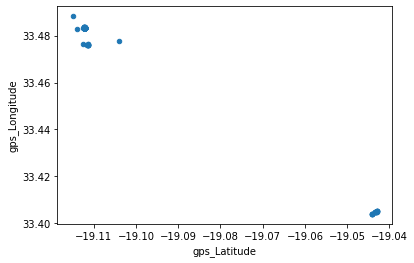

In [4]:
safi_df.plot.scatter('gps_Latitude','gps_Longitude')

With seaborn, however, we can control it more, changing the color of the points based on a column of the data.

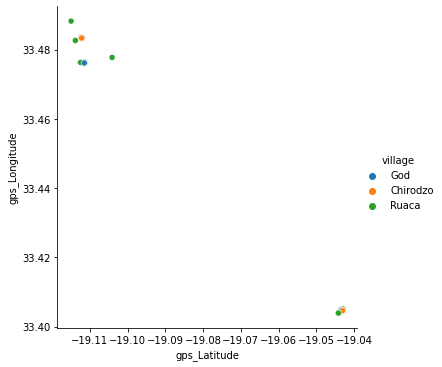

In [5]:
sns.relplot(x= 'gps_Latitude',y='gps_Longitude',
           data=safi_df, hue='village')

We can also plot a single variable to see the quantiles (the box is 25%-50%) and see if there are outliers (the points outside the box).

<AxesSubplot:>

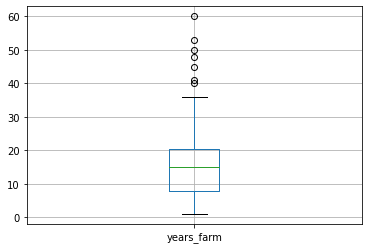

In [6]:
safi_df.boxplot('years_farm')

We can do some more conditiioning, even with only pandas. Using the `by` parameter will do a `groupby` operation first and then make the plot.

<AxesSubplot:title={'center':'years_farm'}, xlabel='village'>

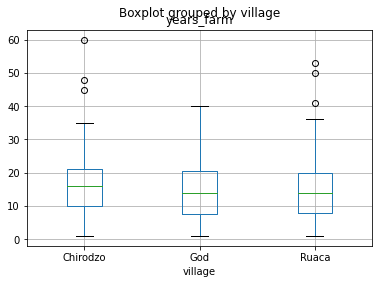

In [7]:
safi_df.boxplot('years_farm', by='village')

We can also make the figure larger

<AxesSubplot:title={'center':'years_farm'}, xlabel='village'>

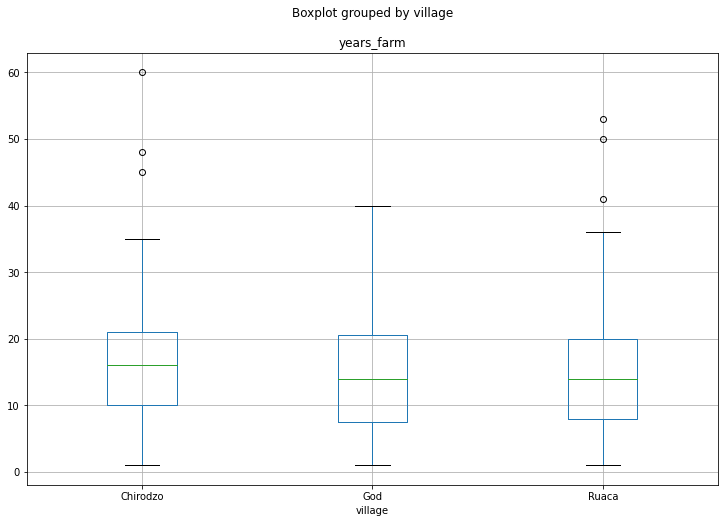

In [8]:
safi_df.boxplot('years_farm', by='village',figsize=(12,8))

We can see how a single variable is distributed in more detail with the [seaborn displot](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot).

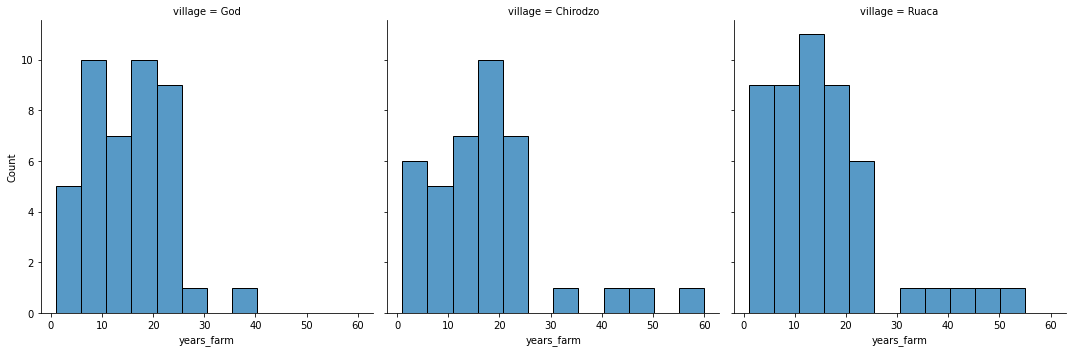

In [9]:
sns.displot(data=safi_df, x='years_farm',col='village')

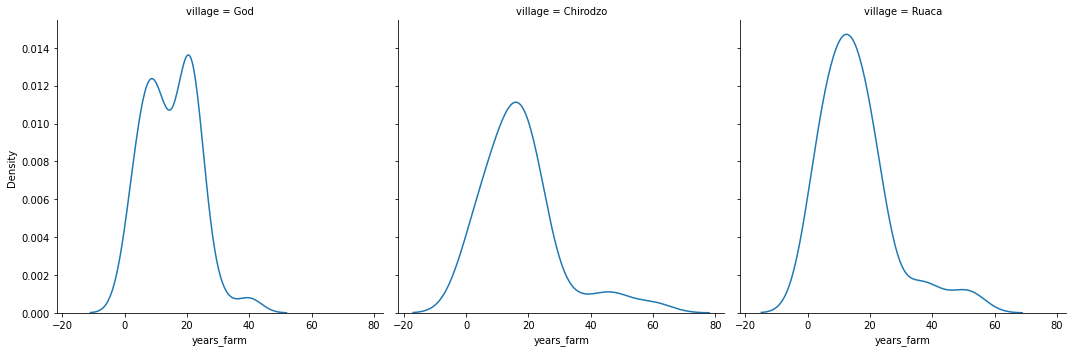

In [10]:
sns.displot(data=safi_df, x='years_farm',col='village',kind='kde')

## Updating Seaborn
the `displot` is new in seaborn 0.11, on your terminal (mac, linux) or anaconda prompt(Windows):
```
pip install update seaborn
```

Then restart your notebook's kernel and re-run all cells

or, in a notebook, you can update with
```{margin}
This is set to not run on the served site
```

```
!pip install seaborn==0.11.0
```

## Regression plots

We can also plot with some calculations done for us already.

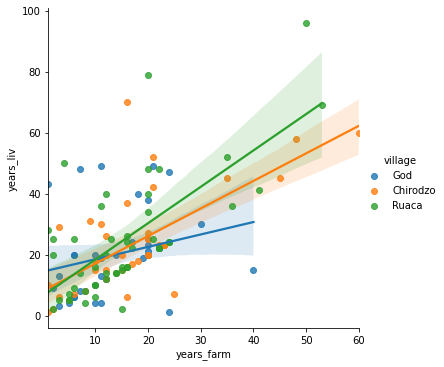

In [11]:
sns.lmplot(x='years_farm',y='years_liv', data=safi_df,
           hue='village')

And we can make grids of plots with the `row` and `col` parameters. We can turn off the regression lines with the `fit_reg` parameter.

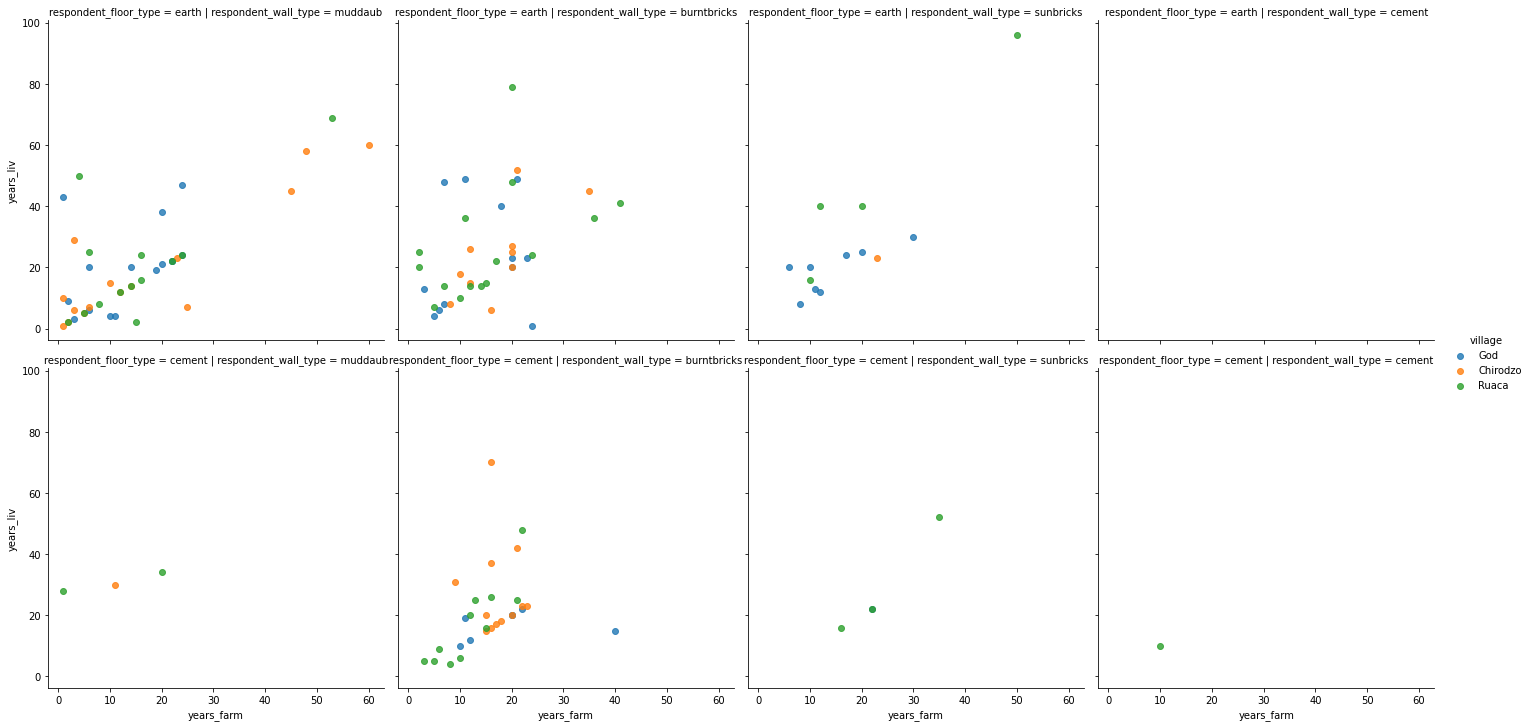

In [12]:
sns.lmplot(x='years_farm',y='years_liv', data=safi_df,
           hue='village',  col='respondent_wall_type',row='respondent_floor_type',
           fit_reg=False)

In [13]:
safi_df.groupby('poultry')['members_count'].mean()

poultry
no     5.894737
yes    7.720430
Name: members_count, dtype: float64

## Questions after class


## More practice

Test out the parameters of the plotting functions to see what they do.

## Further Reading

- [Pandas Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html)
- [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)
- [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html)

If you've made it this far, [let me know](https://forms.gle/PDATAmuRS5tAHiiZ8) how you found these notes.